1. Here in the below data set you will implement the Regression Models can be written in
 Python and how to find the Slope and Coefficients of the given data.

The dataset has been attached here -

a. Import the required Libraries

b. Reading our Dataset.

c. Visualizing the Data using HeatMap

d. Check the correlations in the dataset

e. Make features

f. Train test splitting

g. Generating the model and train regression model

h. Check Coefficients, Intercept, R-Squared Value

I. Evaluate the model and give a proper view of performance

Here ans all the given question ----------------->



a. Import the required Libraries

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder

b. Reading our Dataset.

In [31]:
df = pd.read_csv('/content/LabData.csv')

In [32]:
df.head()

,Serial No.,Degree,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,B.Sc,337.0,118.0,4.0,4.5,4.5,9.65,1.0,0.92
1,2,B.Sc,324.0,107.0,4.0,4.0,4.5,8.87,1.0,0.76
2,3,B.Sc,316.0,104.0,3.0,3.0,3.5,8.00,1.0,0.72
3,4,B.Sc,322.0,110.0,3.0,3.5,2.5,8.67,NaN,0.80
4,5,B.Sc,314.0,103.0,2.0,2.0,3.0,8.21,0.0,NaN


c. Visualizing the Data using HeatMap

In [33]:
le = LabelEncoder()
df['Degree'] = le.fit_transform(df['Degree'])
df.head()


,Serial No.,Degree,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,0,337.0,118.0,4.0,4.5,4.5,9.65,1.0,0.92
1,2,0,324.0,107.0,4.0,4.0,4.5,8.87,1.0,0.76
2,3,0,316.0,104.0,3.0,3.0,3.5,8.00,1.0,0.72
3,4,0,322.0,110.0,3.0,3.5,2.5,8.67,NaN,0.80
4,5,0,314.0,103.0,2.0,2.0,3.0,8.21,0.0,NaN


In [34]:
df = df.drop(columns=['Serial No.'])

In [35]:
df.fillna(df.median(numeric_only=True), inplace=True)

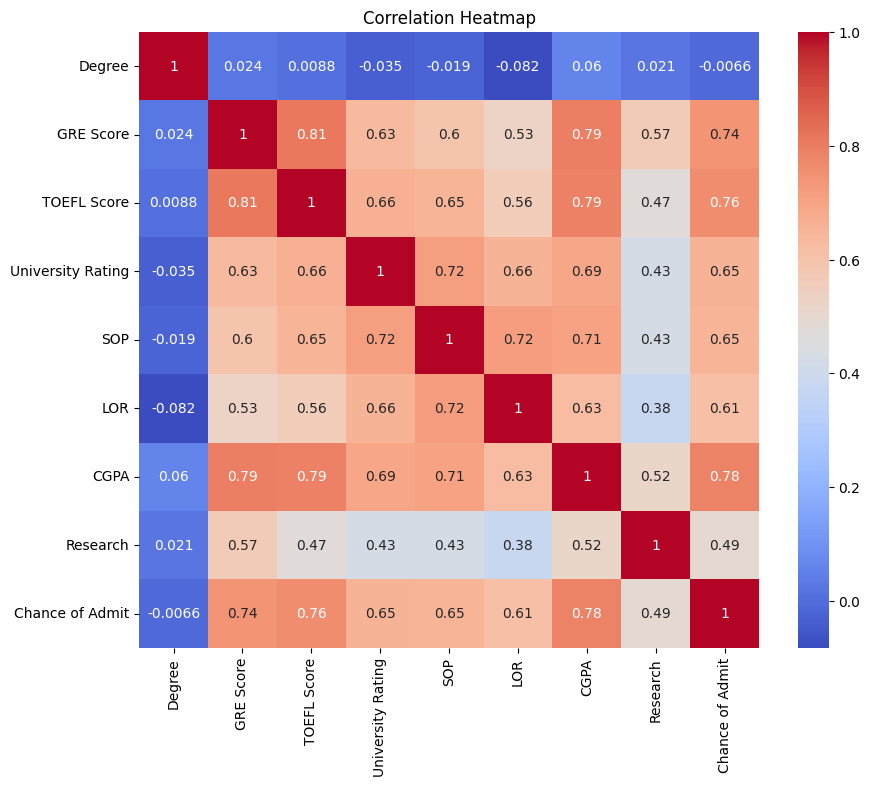

In [36]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

d. Check the correlations in the dataset

In [37]:
print("\nFeature Correlations:\n", df.corr())



Feature Correlations:
                      Degree  GRE Score  TOEFL Score  University Rating  \
Degree             1.000000   0.024131     0.008758          -0.035452   
GRE Score          0.024131   1.000000     0.811536           0.629449   
TOEFL Score        0.008758   0.811536     1.000000           0.662152   
University Rating -0.035452   0.629449     0.662152           1.000000   
SOP               -0.019495   0.597360     0.652029           0.715234   
LOR               -0.082125   0.527833     0.558256           0.657480   
CGPA               0.059636   0.793850     0.792553           0.691447   
Research           0.021238   0.566177     0.472503           0.427669   
Chance of Admit   -0.006634   0.742462     0.760102           0.654150   

                        SOP       LOR      CGPA  Research  Chance of Admit  
Degree            -0.019495 -0.082125  0.059636  0.021238        -0.006634  
GRE Score          0.597360  0.527833  0.793850  0.566177         0.742462  
TOEF

e. Make features

In [27]:
X = df.drop(columns='Chance of Admit')
y = df['Chance of Admit']


In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

print("\nModel Intercept:", model.intercept_)
print("Model Coefficients:", model.coef_)
print("R² on Train Set:", model.score(X_train, y_train))
print("R² on Test Set:", model.score(X_test, y_test))


Model Intercept: -1.1385939851831535
Model Coefficients: [0.00248852 0.00198137 0.00494725 0.0069529  0.01027838 0.01486995
 0.06888619 0.01155312]
R² on Train Set: 0.714236256589019
R² on Test Set: 0.6324346818026447


f. Train test splitting

g. Generating the model and train regression model

h. Check Coefficients, Intercept, R-Squared Value

I. Evaluate the model and give a proper view of performance


Evaluation Metrics:
Mean Squared Error: 0.007357457339818812
Mean Absolute Error: 0.06253156841139676
R² Score: 0.6324346818026447


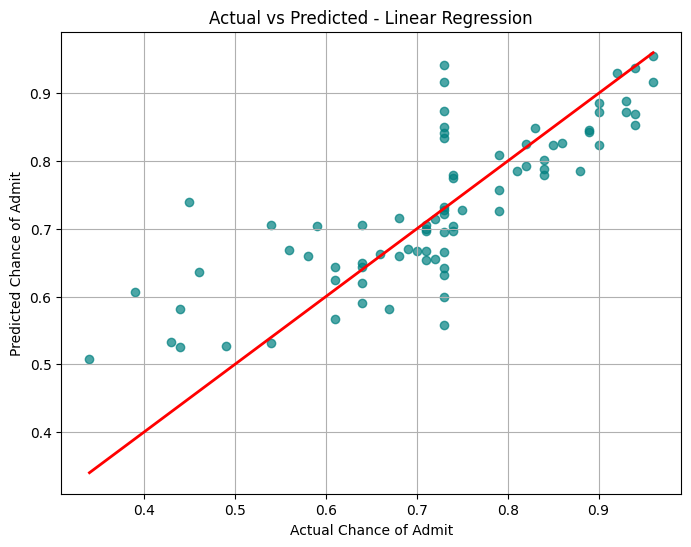

In [29]:
y_pred = model.predict(X_test)
print("\nEvaluation Metrics:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel("Actual Chance of Admit")
plt.ylabel("Predicted Chance of Admit")
plt.title("Actual vs Predicted - Linear Regression")
plt.grid(True)
plt.show()